# <center>Flight Price Prediction</center>

# <h2>Importing the Libraries</h2>

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [29]:

import os
os.chdir("E:\\flight_clone\\Flight-Fare-Prediction-master")

print("Current Working Directory:", os.getcwd())


Current Working Directory: E:\flight_clone\Flight-Fare-Prediction-master


In [30]:
# data = pd.read_excel(r"C:\Users\kunal\Desktop\temp.xlsx")
print("Current Working Directory:", os.getcwd())
data = pd.read_csv(r"E:\flight_clone\Flight-Fare-Prediction-master\notebook\formatted_filtered_dataset.csv")
data.head(10)

Current Working Directory: E:\flight_clone\Flight-Fare-Prediction-master


,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price
0,IndiGo,2019-03-24,22:20,Banglore,2h 50m,non-stop,01:10,New Delhi,3897
1,Air India,2019-05-01,05:50,Kolkata,7h 25m,2 stops,13:15,Banglore,7662
2,IndiGo,2019-05-12,18:05,Kolkata,5h 25m,1 stop,23:30,Banglore,6218
3,IndiGo,2019-03-01,16:50,Banglore,4h 45m,1 stop,21:35,New Delhi,13302
4,SpiceJet,2019-06-24,09:00,Kolkata,2h 25m,non-stop,11:25,Banglore,3873
5,Air India,2019-06-01,09:45,Delhi,13h 15m,1 stop,23:00,Cochin,8907
6,IndiGo,2019-04-18,20:20,Kolkata,2h 35m,non-stop,22:55,Banglore,4174
7,Air India,2019-06-24,11:40,Chennai,2h 15m,non-stop,13:55,Kolkata,4667
8,IndiGo,2019-04-24,17:15,Kolkata,2h 35m,non-stop,19:50,Banglore,4804
9,Air India,2019-03-03,16:40,Delhi,26h 35m,2 stops,19:15,Cochin,14011


In [31]:
# Check unique values in the 'stops' column to see the exact formatting
print(data['stops'].unique())

# Mapping for stops
stop_map = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

# Apply the mapping
data['stops'] = data['stops'].map(stop_map)

# Handle NaN values by filling with a default value (e.g., 0 for "non-stop")
data['stops'] = data['stops'].fillna(0)  # Adjust 0 if you want another value

# Check the data after replacement
print(data['stops'].unique())
data


['non-stop' '2 stops' '1 stop' '3 stops' nan '4 stops']
[0. 2. 1. 3. 4.]


,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price
0,IndiGo,2019-03-24,22:20,Banglore,2h 50m,0.0,01:10,New Delhi,3897
1,Air India,2019-05-01,05:50,Kolkata,7h 25m,2.0,13:15,Banglore,7662
2,IndiGo,2019-05-12,18:05,Kolkata,5h 25m,1.0,23:30,Banglore,6218
3,IndiGo,2019-03-01,16:50,Banglore,4h 45m,1.0,21:35,New Delhi,13302
4,SpiceJet,2019-06-24,09:00,Kolkata,2h 25m,0.0,11:25,Banglore,3873
...,...,...,...,...,...,...,...,...,...
5097,Air India,2019-06-09,06:20,Mumbai,1h 20m,0.0,07:40,Hyderabad,3100
5098,SpiceJet,2019-05-21,05:55,Banglore,2h 40m,0.0,08:35,Delhi,3257
5099,Air India,2019-04-27,20:45,Kolkata,2h 35m,0.0,23:20,Banglore,4145
5100,Vistara,2019-03-01,11:30,Banglore,2h 40m,0.0,14:10,New Delhi,12648


# EDA

In [32]:
data.isnull().sum()

flight_name        0
date               0
departure_time     0
departure_loc      0
flight_duration    0
stops              0
arrival_time       0
arrival_loc        0
price              0
dtype: int64

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5102 entries, 0 to 5101
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   flight_name      5102 non-null   object 
 1   date             5102 non-null   object 
 2   departure_time   5102 non-null   object 
 3   departure_loc    5102 non-null   object 
 4   flight_duration  5102 non-null   object 
 5   stops            5102 non-null   float64
 6   arrival_time     5102 non-null   object 
 7   arrival_loc      5102 non-null   object 
 8   price            5102 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 358.9+ KB


<AxesSubplot:>

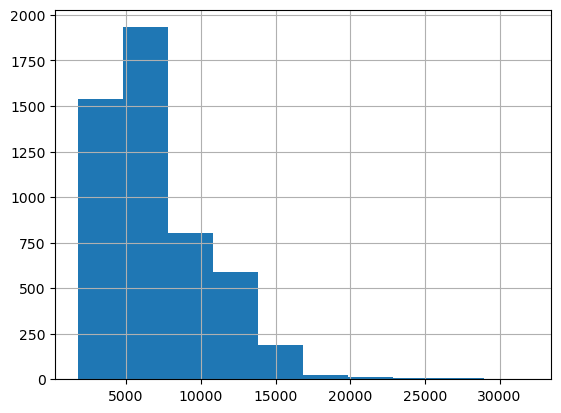

In [34]:
# Distribution of Prices

data['price'].hist()

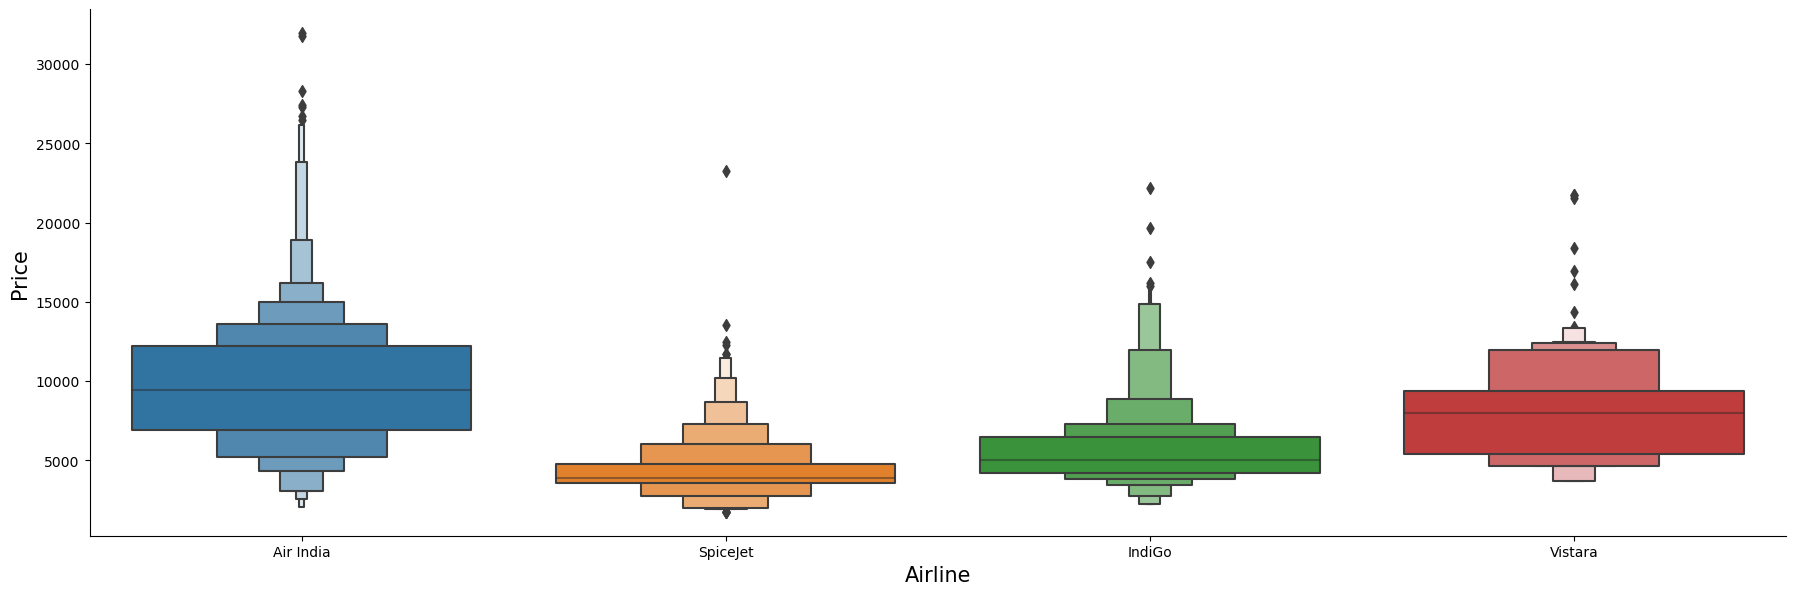

In [35]:
# Airline vs Price

sns.catplot(y = 'price', x = 'flight_name', data = data.sort_values('price', ascending=False),kind='boxen',height = 6, aspect = 3)
plt.xlabel('Airline',size=15)
plt.ylabel('Price',size=15)
plt.show()

# <h2>Feature Engineering / Data Preproccesing</h2>

In [36]:
data['dep_hour'] = pd.to_datetime(data['departure_time'].astype(str)).dt.hour
data['dep_min'] = pd.to_datetime(data['departure_time'].astype(str)).dt.minute
data

,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price,dep_hour,dep_min
0,IndiGo,2019-03-24,22:20,Banglore,2h 50m,0.0,01:10,New Delhi,3897,22,20
1,Air India,2019-05-01,05:50,Kolkata,7h 25m,2.0,13:15,Banglore,7662,5,50
2,IndiGo,2019-05-12,18:05,Kolkata,5h 25m,1.0,23:30,Banglore,6218,18,5
3,IndiGo,2019-03-01,16:50,Banglore,4h 45m,1.0,21:35,New Delhi,13302,16,50
4,SpiceJet,2019-06-24,09:00,Kolkata,2h 25m,0.0,11:25,Banglore,3873,9,0
...,...,...,...,...,...,...,...,...,...,...,...
5097,Air India,2019-06-09,06:20,Mumbai,1h 20m,0.0,07:40,Hyderabad,3100,6,20
5098,SpiceJet,2019-05-21,05:55,Banglore,2h 40m,0.0,08:35,Delhi,3257,5,55
5099,Air India,2019-04-27,20:45,Kolkata,2h 35m,0.0,23:20,Banglore,4145,20,45
5100,Vistara,2019-03-01,11:30,Banglore,2h 40m,0.0,14:10,New Delhi,12648,11,30


In [37]:
data['arr_hour'] = pd.to_datetime(data['arrival_time'].astype(str)).dt.hour
data['arr_min'] = pd.to_datetime(data['arrival_time'].astype(str)).dt.minute
data

,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,2019-03-24,22:20,Banglore,2h 50m,0.0,01:10,New Delhi,3897,22,20,1,10
1,Air India,2019-05-01,05:50,Kolkata,7h 25m,2.0,13:15,Banglore,7662,5,50,13,15
2,IndiGo,2019-05-12,18:05,Kolkata,5h 25m,1.0,23:30,Banglore,6218,18,5,23,30
3,IndiGo,2019-03-01,16:50,Banglore,4h 45m,1.0,21:35,New Delhi,13302,16,50,21,35
4,SpiceJet,2019-06-24,09:00,Kolkata,2h 25m,0.0,11:25,Banglore,3873,9,0,11,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,Air India,2019-06-09,06:20,Mumbai,1h 20m,0.0,07:40,Hyderabad,3100,6,20,7,40
5098,SpiceJet,2019-05-21,05:55,Banglore,2h 40m,0.0,08:35,Delhi,3257,5,55,8,35
5099,Air India,2019-04-27,20:45,Kolkata,2h 35m,0.0,23:20,Banglore,4145,20,45,23,20
5100,Vistara,2019-03-01,11:30,Banglore,2h 40m,0.0,14:10,New Delhi,12648,11,30,14,10


In [38]:
data['Journey_Day'] = pd.to_datetime(data['date']).dt.day
data['Journey_Month'] = pd.to_datetime(data['date']).dt.month
data

,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,IndiGo,2019-03-24,22:20,Banglore,2h 50m,0.0,01:10,New Delhi,3897,22,20,1,10,24,3
1,Air India,2019-05-01,05:50,Kolkata,7h 25m,2.0,13:15,Banglore,7662,5,50,13,15,1,5
2,IndiGo,2019-05-12,18:05,Kolkata,5h 25m,1.0,23:30,Banglore,6218,18,5,23,30,12,5
3,IndiGo,2019-03-01,16:50,Banglore,4h 45m,1.0,21:35,New Delhi,13302,16,50,21,35,1,3
4,SpiceJet,2019-06-24,09:00,Kolkata,2h 25m,0.0,11:25,Banglore,3873,9,0,11,25,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,Air India,2019-06-09,06:20,Mumbai,1h 20m,0.0,07:40,Hyderabad,3100,6,20,7,40,9,6
5098,SpiceJet,2019-05-21,05:55,Banglore,2h 40m,0.0,08:35,Delhi,3257,5,55,8,35,21,5
5099,Air India,2019-04-27,20:45,Kolkata,2h 35m,0.0,23:20,Banglore,4145,20,45,23,20,27,4
5100,Vistara,2019-03-01,11:30,Banglore,2h 40m,0.0,14:10,New Delhi,12648,11,30,14,10,1,3


In [39]:
data.drop(['date','departure_time','arrival_time'], axis = 1, inplace = True)
data

,flight_name,departure_loc,flight_duration,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,IndiGo,Banglore,2h 50m,0.0,New Delhi,3897,22,20,1,10,24,3
1,Air India,Kolkata,7h 25m,2.0,Banglore,7662,5,50,13,15,1,5
2,IndiGo,Kolkata,5h 25m,1.0,Banglore,6218,18,5,23,30,12,5
3,IndiGo,Banglore,4h 45m,1.0,New Delhi,13302,16,50,21,35,1,3
4,SpiceJet,Kolkata,2h 25m,0.0,Banglore,3873,9,0,11,25,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...
5097,Air India,Mumbai,1h 20m,0.0,Hyderabad,3100,6,20,7,40,9,6
5098,SpiceJet,Banglore,2h 40m,0.0,Delhi,3257,5,55,8,35,21,5
5099,Air India,Kolkata,2h 35m,0.0,Banglore,4145,20,45,23,20,27,4
5100,Vistara,Banglore,2h 40m,0.0,New Delhi,12648,11,30,14,10,1,3


In [40]:
data['stops'].value_counts()

0.0    2593
1.0    1696
2.0     775
3.0      37
4.0       1
Name: stops, dtype: int64

In [41]:
data.replace({'non-stop ' : 0, '1-stop' : 1, '1-stopVia Indore' : 1,'1-stopVia Mumbai' : 1, '2+-stop' : 2,'1-stopVia IDR' : 1,'1-stopVia VTZ' : 1,'1-stopVia Delhi' : 1,'1-stopVia Bagdogra' : 1}, inplace=True)
data

,flight_name,departure_loc,flight_duration,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,IndiGo,Banglore,2h 50m,0.0,New Delhi,3897,22,20,1,10,24,3
1,Air India,Kolkata,7h 25m,2.0,Banglore,7662,5,50,13,15,1,5
2,IndiGo,Kolkata,5h 25m,1.0,Banglore,6218,18,5,23,30,12,5
3,IndiGo,Banglore,4h 45m,1.0,New Delhi,13302,16,50,21,35,1,3
4,SpiceJet,Kolkata,2h 25m,0.0,Banglore,3873,9,0,11,25,24,6
...,...,...,...,...,...,...,...,...,...,...,...,...
5097,Air India,Mumbai,1h 20m,0.0,Hyderabad,3100,6,20,7,40,9,6
5098,SpiceJet,Banglore,2h 40m,0.0,Delhi,3257,5,55,8,35,21,5
5099,Air India,Kolkata,2h 35m,0.0,Banglore,4145,20,45,23,20,27,4
5100,Vistara,Banglore,2h 40m,0.0,New Delhi,12648,11,30,14,10,1,3


In [42]:
data['stops'].value_counts()

0.0    2593
1.0    1696
2.0     775
3.0      37
4.0       1
Name: stops, dtype: int64

In [43]:
duration = list(data['flight_duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [44]:
data['Duration_hours'] = duration_hours
data['Duration_mins'] = duration_mins
data

,flight_name,departure_loc,flight_duration,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,IndiGo,Banglore,2h 50m,0.0,New Delhi,3897,22,20,1,10,24,3,2,50
1,Air India,Kolkata,7h 25m,2.0,Banglore,7662,5,50,13,15,1,5,7,25
2,IndiGo,Kolkata,5h 25m,1.0,Banglore,6218,18,5,23,30,12,5,5,25
3,IndiGo,Banglore,4h 45m,1.0,New Delhi,13302,16,50,21,35,1,3,4,45
4,SpiceJet,Kolkata,2h 25m,0.0,Banglore,3873,9,0,11,25,24,6,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,Air India,Mumbai,1h 20m,0.0,Hyderabad,3100,6,20,7,40,9,6,1,20
5098,SpiceJet,Banglore,2h 40m,0.0,Delhi,3257,5,55,8,35,21,5,2,40
5099,Air India,Kolkata,2h 35m,0.0,Banglore,4145,20,45,23,20,27,4,2,35
5100,Vistara,Banglore,2h 40m,0.0,New Delhi,12648,11,30,14,10,1,3,2,40


In [45]:
data.drop(['flight_duration'],axis=1,inplace=True)
data

,flight_name,departure_loc,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins
0,IndiGo,Banglore,0.0,New Delhi,3897,22,20,1,10,24,3,2,50
1,Air India,Kolkata,2.0,Banglore,7662,5,50,13,15,1,5,7,25
2,IndiGo,Kolkata,1.0,Banglore,6218,18,5,23,30,12,5,5,25
3,IndiGo,Banglore,1.0,New Delhi,13302,16,50,21,35,1,3,4,45
4,SpiceJet,Kolkata,0.0,Banglore,3873,9,0,11,25,24,6,2,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,Air India,Mumbai,0.0,Hyderabad,3100,6,20,7,40,9,6,1,20
5098,SpiceJet,Banglore,0.0,Delhi,3257,5,55,8,35,21,5,2,40
5099,Air India,Kolkata,0.0,Banglore,4145,20,45,23,20,27,4,2,35
5100,Vistara,Banglore,0.0,New Delhi,12648,11,30,14,10,1,3,2,40


In [46]:
data['flight_name'].value_counts()

IndiGo       2053
Air India    1752
SpiceJet      818
Vistara       479
Name: flight_name, dtype: int64

In [47]:
# Airline = data['flight_name']
# Airline = pd.get_dummies(Airline)  # Removed drop_first=True
# Airline.head()
# Define the target airlines you want in your dataset
target_airlines = ["AirAsia", "AkasaAir", "GO FIRST", "Indigo", "SpiceJet", "Vistara"]

# Create dummies from the 'flight_name' column
Airline = pd.get_dummies(data['flight_name'])

# Add any missing columns for the airlines that should be included
for airline in target_airlines:
    if airline not in Airline.columns:
        Airline[airline] = 0  # Fill with zeros for missing airlines

# Reorder columns to match the target list, if needed
Airline = Airline[target_airlines]

# Display the resulting DataFrame
Airline.head()



,AirAsia,AkasaAir,GO FIRST,Indigo,SpiceJet,Vistara
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,0


In [48]:
list1 = ['departure_loc', 'arrival_loc']
for l in list1:
    print(data[[l]].value_counts(), '\n')

departure_loc
Delhi            1584
Kolkata          1440
Banglore         1221
Mumbai            477
Chennai           380
dtype: int64 

arrival_loc
Cochin         1584
Banglore       1440
Delhi           754
Hyderabad       477
New Delhi       467
Kolkata         380
dtype: int64 



In [49]:
data = pd.get_dummies(data = data, columns=list1, drop_first=True)
data

,flight_name,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,departure_loc_Chennai,departure_loc_Delhi,departure_loc_Kolkata,departure_loc_Mumbai,arrival_loc_Cochin,arrival_loc_Delhi,arrival_loc_Hyderabad,arrival_loc_Kolkata,arrival_loc_New Delhi
0,IndiGo,0.0,3897,22,20,1,10,24,3,2,50,0,0,0,0,0,0,0,0,1
1,Air India,2.0,7662,5,50,13,15,1,5,7,25,0,0,1,0,0,0,0,0,0
2,IndiGo,1.0,6218,18,5,23,30,12,5,5,25,0,0,1,0,0,0,0,0,0
3,IndiGo,1.0,13302,16,50,21,35,1,3,4,45,0,0,0,0,0,0,0,0,1
4,SpiceJet,0.0,3873,9,0,11,25,24,6,2,25,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,Air India,0.0,3100,6,20,7,40,9,6,1,20,0,0,0,1,0,0,1,0,0
5098,SpiceJet,0.0,3257,5,55,8,35,21,5,2,40,0,0,0,0,0,1,0,0,0
5099,Air India,0.0,4145,20,45,23,20,27,4,2,35,0,0,1,0,0,0,0,0,0
5100,Vistara,0.0,12648,11,30,14,10,1,3,2,40,0,0,0,0,0,0,0,0,1


In [50]:
data = pd.concat([data, Airline], axis = 1)
data

,flight_name,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,...,arrival_loc_Delhi,arrival_loc_Hyderabad,arrival_loc_Kolkata,arrival_loc_New Delhi,AirAsia,AkasaAir,GO FIRST,Indigo,SpiceJet,Vistara
0,IndiGo,0.0,3897,22,20,1,10,24,3,2,...,0,0,0,1,0,0,0,0,0,0
1,Air India,2.0,7662,5,50,13,15,1,5,7,...,0,0,0,0,0,0,0,0,0,0
2,IndiGo,1.0,6218,18,5,23,30,12,5,5,...,0,0,0,0,0,0,0,0,0,0
3,IndiGo,1.0,13302,16,50,21,35,1,3,4,...,0,0,0,1,0,0,0,0,0,0
4,SpiceJet,0.0,3873,9,0,11,25,24,6,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,Air India,0.0,3100,6,20,7,40,9,6,1,...,0,1,0,0,0,0,0,0,0,0
5098,SpiceJet,0.0,3257,5,55,8,35,21,5,2,...,1,0,0,0,0,0,0,0,1,0
5099,Air India,0.0,4145,20,45,23,20,27,4,2,...,0,0,0,0,0,0,0,0,0,0
5100,Vistara,0.0,12648,11,30,14,10,1,3,2,...,0,0,0,1,0,0,0,0,0,1


In [51]:
data.drop(['flight_name'],axis=1,inplace=True)
data

,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,...,arrival_loc_Delhi,arrival_loc_Hyderabad,arrival_loc_Kolkata,arrival_loc_New Delhi,AirAsia,AkasaAir,GO FIRST,Indigo,SpiceJet,Vistara
0,0.0,3897,22,20,1,10,24,3,2,50,...,0,0,0,1,0,0,0,0,0,0
1,2.0,7662,5,50,13,15,1,5,7,25,...,0,0,0,0,0,0,0,0,0,0
2,1.0,6218,18,5,23,30,12,5,5,25,...,0,0,0,0,0,0,0,0,0,0
3,1.0,13302,16,50,21,35,1,3,4,45,...,0,0,0,1,0,0,0,0,0,0
4,0.0,3873,9,0,11,25,24,6,2,25,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5097,0.0,3100,6,20,7,40,9,6,1,20,...,0,1,0,0,0,0,0,0,0,0
5098,0.0,3257,5,55,8,35,21,5,2,40,...,1,0,0,0,0,0,0,0,1,0
5099,0.0,4145,20,45,23,20,27,4,2,35,...,0,0,0,0,0,0,0,0,0,0
5100,0.0,12648,11,30,14,10,1,3,2,40,...,0,0,0,1,0,0,0,0,0,1


# <h2>Feature Selection/Importance</h2>

In [52]:
data.shape

(5102, 25)

In [53]:
data.columns

Index(['stops', 'price', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins',
       'departure_loc_Chennai', 'departure_loc_Delhi', 'departure_loc_Kolkata',
       'departure_loc_Mumbai', 'arrival_loc_Cochin', 'arrival_loc_Delhi',
       'arrival_loc_Hyderabad', 'arrival_loc_Kolkata', 'arrival_loc_New Delhi',
       'AirAsia', 'AkasaAir', 'GO FIRST', 'Indigo', 'SpiceJet', 'Vistara'],
      dtype='object')

In [54]:
X = data.loc[:, ['stops', 'price', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
       'Journey_Day', 'Journey_Month', 'Duration_hours', 'Duration_mins',
       'departure_loc_Chennai', 'departure_loc_Delhi', 'departure_loc_Kolkata',
       'departure_loc_Mumbai', 'arrival_loc_Cochin', 'arrival_loc_Delhi',
       'arrival_loc_Hyderabad', 'arrival_loc_Kolkata', 'arrival_loc_New Delhi',
       'AirAsia', 'AkasaAir', 'GO FIRST', 'Indigo', 'SpiceJet', 'Vistara']]
X.head()

,stops,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month,Duration_hours,Duration_mins,...,arrival_loc_Delhi,arrival_loc_Hyderabad,arrival_loc_Kolkata,arrival_loc_New Delhi,AirAsia,AkasaAir,GO FIRST,Indigo,SpiceJet,Vistara
0,0.0,3897,22,20,1,10,24,3,2,50,...,0,0,0,1,0,0,0,0,0,0
1,2.0,7662,5,50,13,15,1,5,7,25,...,0,0,0,0,0,0,0,0,0,0
2,1.0,6218,18,5,23,30,12,5,5,25,...,0,0,0,0,0,0,0,0,0,0
3,1.0,13302,16,50,21,35,1,3,4,45,...,0,0,0,1,0,0,0,0,0,0
4,0.0,3873,9,0,11,25,24,6,2,25,...,0,0,0,0,0,0,0,0,1,0


In [55]:
y = data.iloc[:, 1]
y.head()

0     3897
1     7662
2     6218
3    13302
4     3873
Name: price, dtype: int64

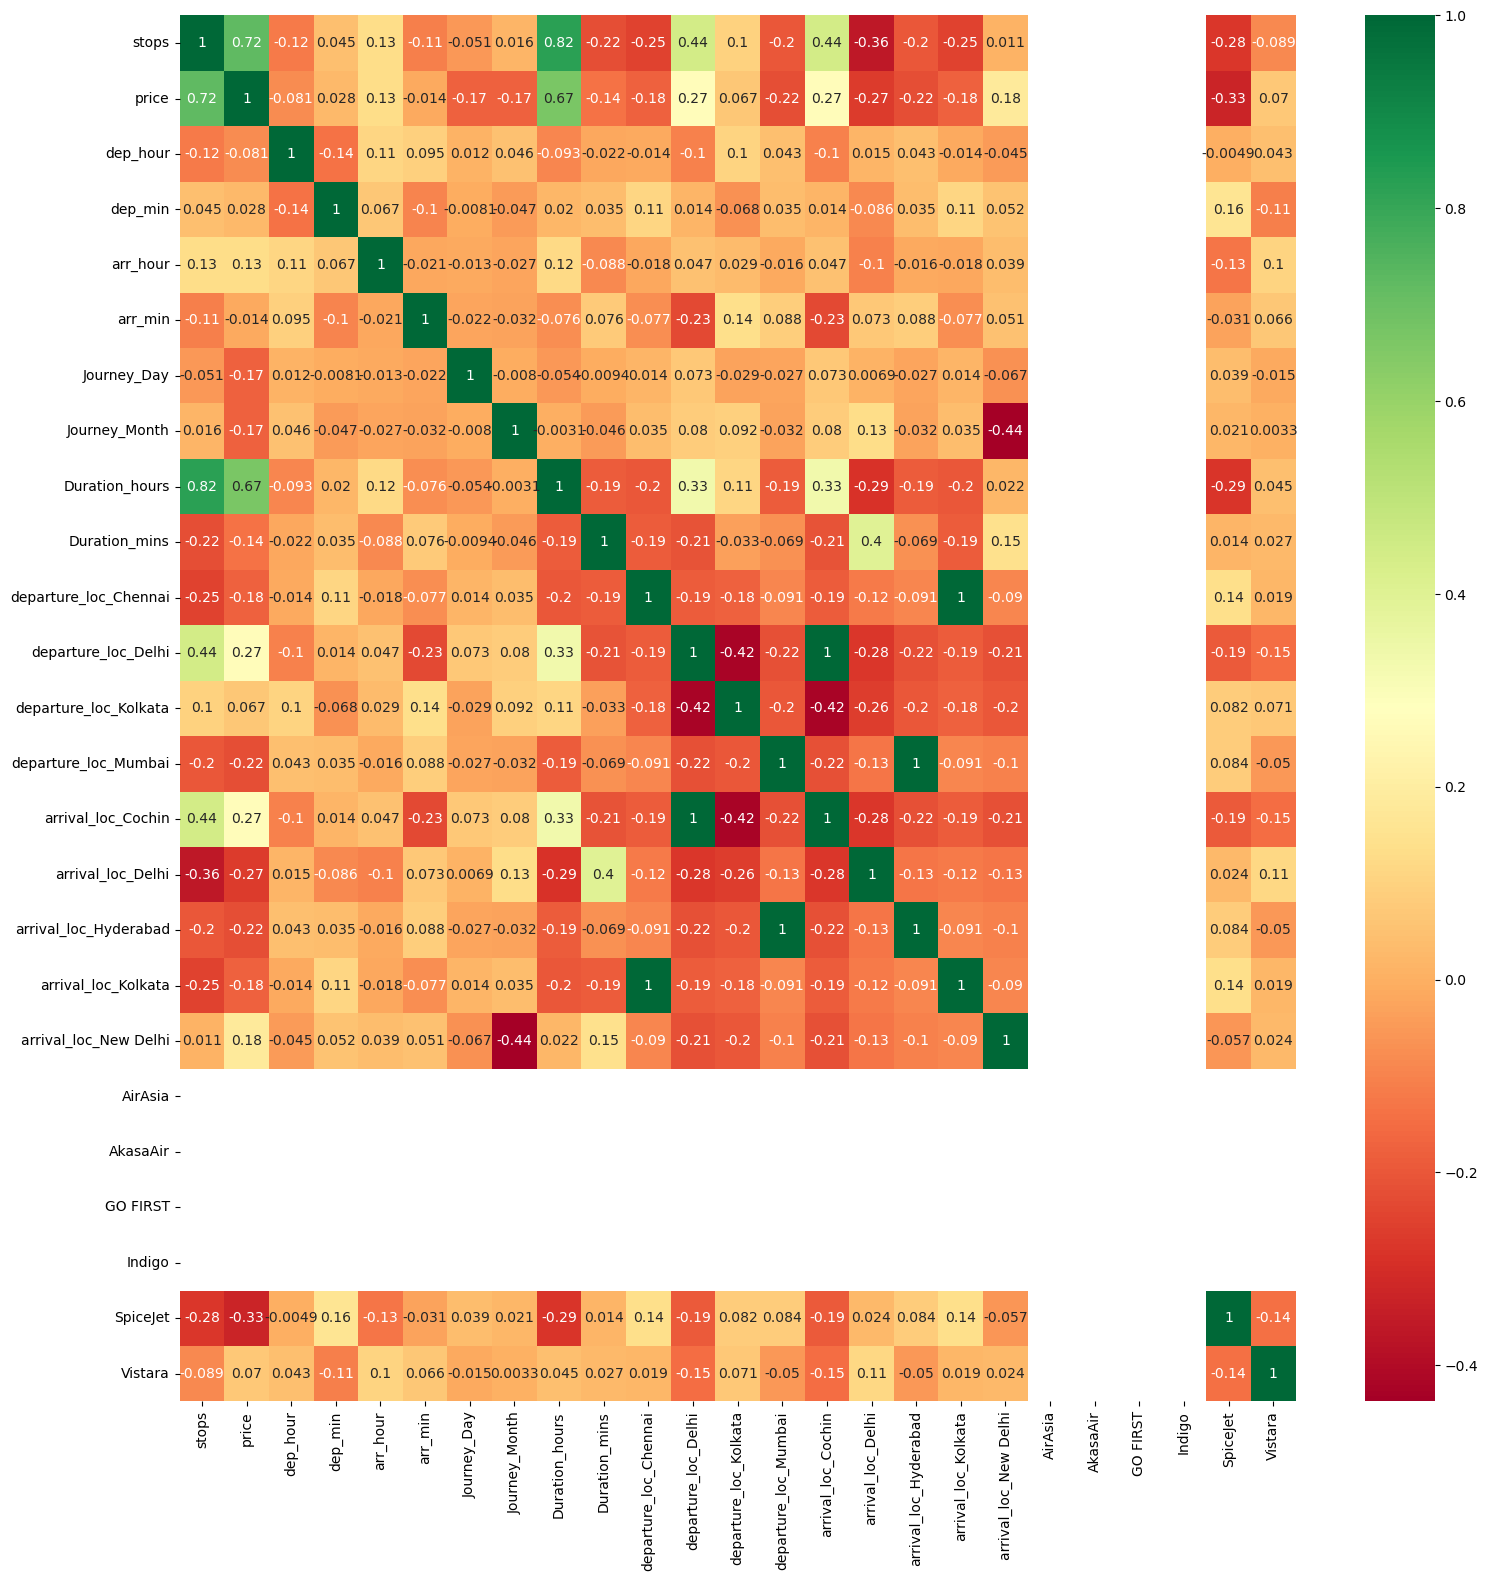

In [56]:
plt.figure(figsize = (18, 18))
sns.heatmap(data.corr(),annot = True, cmap = 'RdYlGn')

plt.show()

In [57]:
from sklearn.ensemble import ExtraTreesRegressor

selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [58]:
print(selection.feature_importances_)

[1.77980171e-01 6.61684544e-01 1.53493270e-04 3.40479398e-04
 1.78722271e-04 3.44772729e-04 3.03615576e-03 5.82778632e-03
 1.13813443e-01 2.22929988e-04 1.13070446e-04 2.54046067e-03
 8.70870359e-04 5.26160107e-03 1.80472571e-03 2.68483891e-04
 2.95673317e-03 9.66737662e-05 8.33145654e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.26309587e-02
 1.54246755e-03]


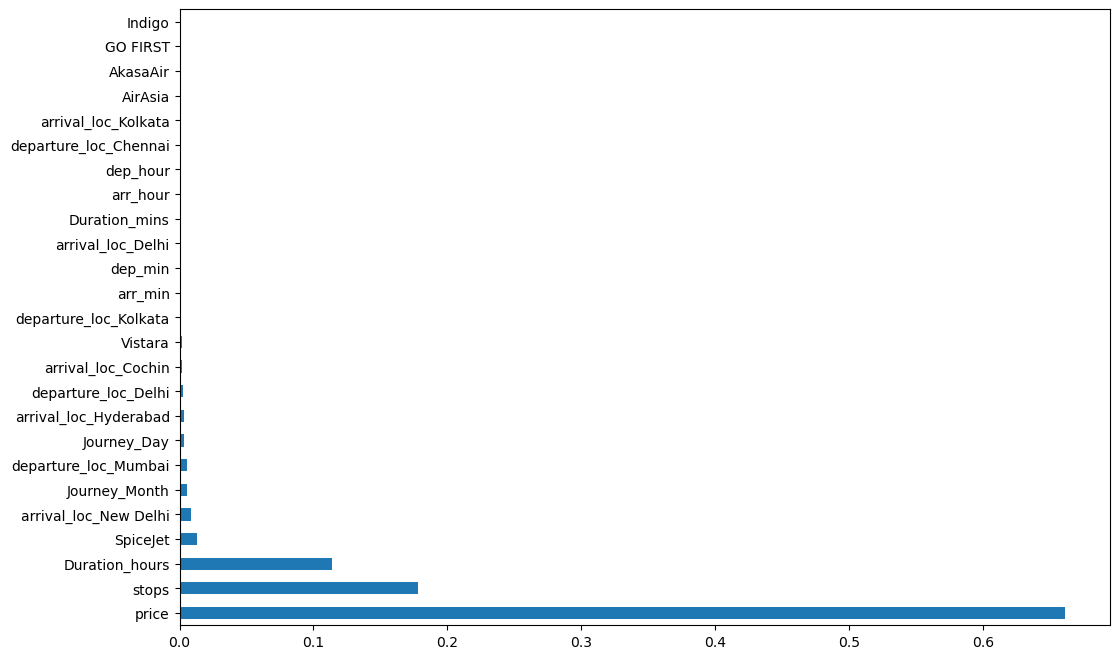

In [59]:
# Feature Importances

plt.figure(figsize = (12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

# <h2>Feature Scaling</h2>

In [60]:
x = data.drop(['price'],axis=1)
y = data['price']

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data1 = scaler.fit_transform(x)

data1[0]

array([-0.8691556 ,  1.64557467, -0.21290736, -1.77386709, -1.00145438,
        1.24823344, -1.37811716, -0.70480395,  1.24004057, -0.28368006,
       -0.67101105, -0.62707874, -0.32114659, -0.67101105, -0.41642894,
       -0.32114659, -0.28368006,  3.1504053 ,  0.        ,  0.        ,
        0.        ,  0.        , -0.4369703 , -0.32188876])

In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((3571, 24), (1531, 24), (3571,), (1531,))

# <h2><center>Linear Regression Model</center></h2>

In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [71]:
y_pred = model.predict(x_test)

In [72]:
metrics(y_test, y_pred)

RMSE: 2256.571602312762
R_Squared_Value: 0.6097243673183539


In [73]:
accuracy(y_test, y_pred)

77.36261602782587

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


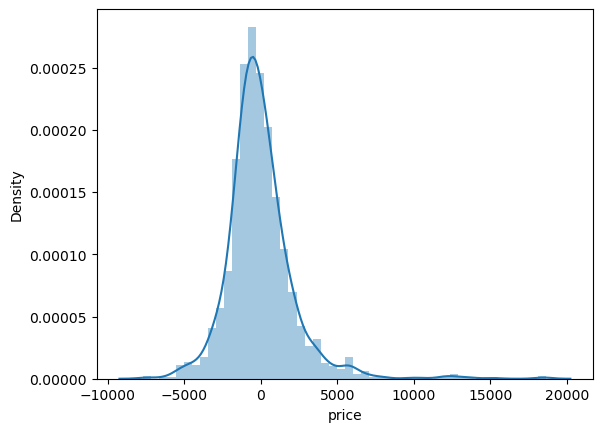

In [74]:
sns.distplot(y_test-y_pred)
plt.show()

# <center>Random Forest Model</center>

In [63]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators = 100, min_samples_split=3)
model_random_forest.fit(x_train, y_train)

RandomForestRegressor(min_samples_split=3)

In [64]:
from sklearn.ensemble import RandomForestRegressor
import pickle

# Initialize and train the model
model_random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=3)
model_random_forest.fit(x_train, y_train)

# Save the model to the current directory as 'random_forest_model.pkl'
with open("random_forest_model.pkl", "wb") as f:
    pickle.dump(model_random_forest, f)
    
print("Model saved as 'random_forest_model.pkl'")


Model saved as 'random_forest_model.pkl'


In [61]:
# import pickle

# # Load the saved model from the .pkl file
# with open('random_forest_model.pkl', 'rb') as f:
#     loaded_model = pickle.load(f)

# # Make predictions using the loaded model
# pred_rf = loaded_model.predict(x_test)

# # Evaluate the predictions using the metrics and accuracy functions
# metrics(y_test, pred_rf)
# accuracy(y_test, pred_rf)


In [62]:
pred_rf = model_random_forest.predict(x_test)

In [63]:
metrics(y_test, pred_rf)

RMSE: 1301.0156783588707
R_Squared_Value: 0.8702706446814537


In [64]:
accuracy(y_test, pred_rf)

91.58920467016696

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


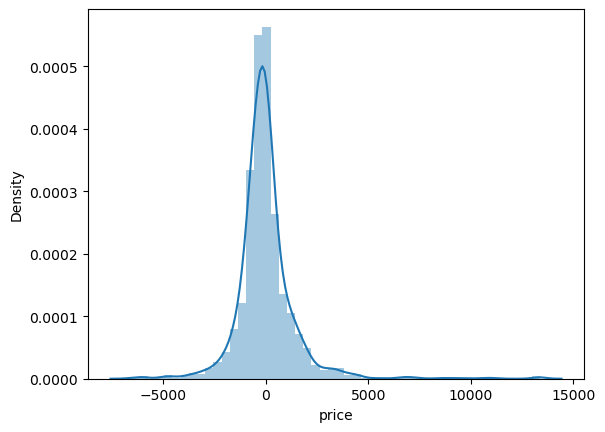

In [65]:
sns.distplot(y_test-pred)
plt.show()

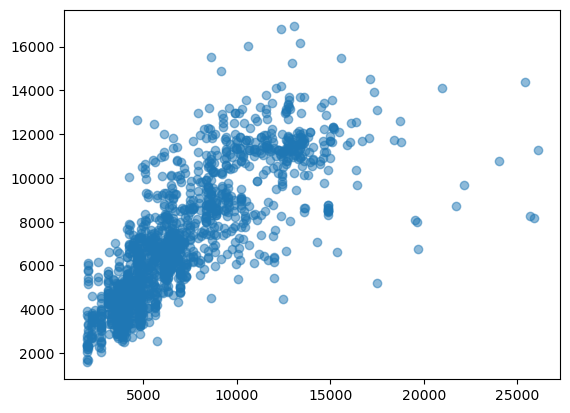

In [66]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.show()

# <h2>Saving the File</h2>

In [67]:
import pickle

In [68]:
model = model_random_forest
pickle.dump(model, open("flight.pkl",'wb'))
print("pkl file saved")

pkl file saved


In [88]:
%pip install scikit-learn==1.5.2
import sklearn
print(sklearn.__version__)


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 11.0/11.0 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 301.8/301.8 kB 2.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
1.0.2


In [65]:
import sklearn
print(sklearn.__version__)

1.5.2


In [66]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (3571, 24)
x_test shape: (1531, 24)


Mean Squared Error: 1692945.3902166355
R2 Score: 0.8702473762212843


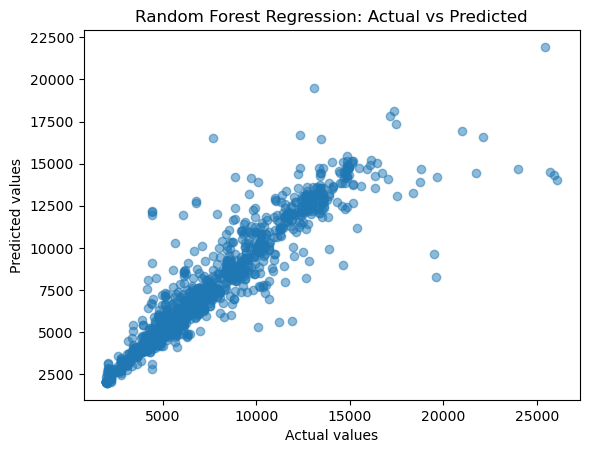

In [68]:
import pickle
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor
model_random_forest = RandomForestRegressor(n_estimators=150, min_samples_split=3)
model_random_forest.fit(x_train, y_train)

# Predict using the trained model
pred_rf = model_random_forest.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, pred_rf)
r2 = r2_score(y_test, pred_rf)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Scatter plot of actual vs predicted values
plt.scatter(y_test, pred_rf, alpha=0.5)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()

# Save the model
pickle.dump(model_random_forest, open("flight_final.pkl", 'wb'))
